# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
from types import SimpleNamespace

import numpy as np
from scipy import optimize

import pandas as pd 
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
from HouseholdSpecializationModel import HouseholdSpecializationModelClass

# Question 1

In [2]:
model = HouseholdSpecializationModelClass()
#Unpaking model parameters
par = model.par

list_alpha = [0.25, 0.5, 0.75]
list_sigma = [0.5, 1.0, 1.5]

#Code solves the discrete model for lists of alpha and sigma 
for i in list_sigma:
    par.sigma = i
    for j in list_alpha:
        par.alpha = j
        opt = model.solve_discrete()
        
        relative_hours = opt.HF/opt.HM
        print(f' For sigma = {par.sigma:.2f} and alpha = {par.alpha:.2f}    relative hours at home: {relative_hours:.2f}')



 For sigma = 0.50 and alpha = 0.25    relative hours at home: 0.55
 For sigma = 0.50 and alpha = 0.50    relative hours at home: 1.00
 For sigma = 0.50 and alpha = 0.75    relative hours at home: 1.83
 For sigma = 1.00 and alpha = 0.25    relative hours at home: 0.31
 For sigma = 1.00 and alpha = 0.50    relative hours at home: 1.00
 For sigma = 1.00 and alpha = 0.75    relative hours at home: 3.25
 For sigma = 1.50 and alpha = 0.25    relative hours at home: 0.21
 For sigma = 1.50 and alpha = 0.50    relative hours at home: 1.00
 For sigma = 1.50 and alpha = 0.75    relative hours at home: 4.67


# Question 2

**Ploting relative wage**

In [3]:
model_2 = HouseholdSpecializationModelClass()
#Unpaking model parameters
par = model_2.par

#list_wage = [0.8, 0.9, 1, 1.1, 1.2]
results_h = []

#Code solves the discrete model for different relativ wages
for i in par.wF_vec:
    par.wF = i
    opt = model_2.solve_discrete()
        
    relative_hours = opt.HF/opt.HM
    log_relative_h = np.log(relative_hours)
    results_h = np.append(results_h, log_relative_h)
    print(f'For the relative wage {i:2f} the optimal relative home hours (HF/HM) {relative_hours:3f}')

print(results_h)


For the relative wage 0.800000 the optimal relative home hours (HF/HM) 1.250000
For the relative wage 0.900000 the optimal relative home hours (HF/HM) 1.000000
For the relative wage 1.000000 the optimal relative home hours (HF/HM) 1.000000
For the relative wage 1.100000 the optimal relative home hours (HF/HM) 0.888889
For the relative wage 1.200000 the optimal relative home hours (HF/HM) 0.800000
[ 0.22314355  0.          0.         -0.11778304 -0.22314355]


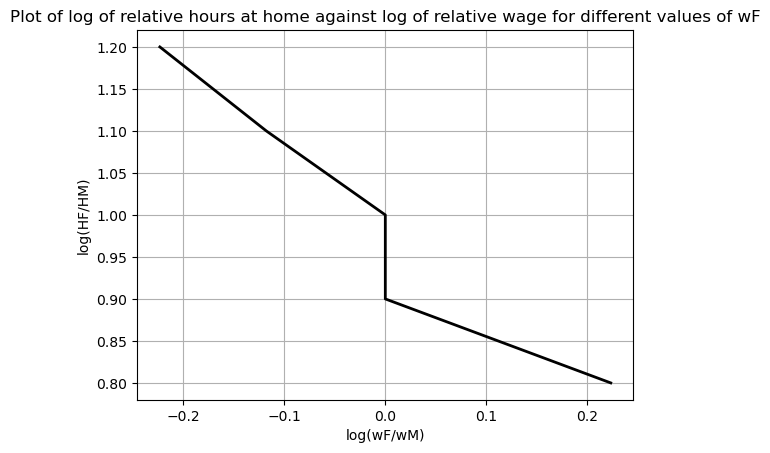

In [4]:
# create figure
fig = plt.figure()
# create plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(results_h, par.wF_vec, color='black', lw=2)
# alterations to figure
ax.grid()
ax.set_xlabel("log(wF/wM)")
ax.set_ylabel("log(HF/HM)")
ax.set_title("Plot of log of relative hours at home against log of relative wage for different values of wF")
plt.show()

# Question 3

NameError: name 'fg' is not defined